In [1]:
import pandas as pd

df = pd.read_parquet('../data/pivot_data_hourly_cleaned.parquet')

In [2]:
from sklearn.model_selection import train_test_split


df = df.dropna()
X = df.shift(1).iloc[1:]  # previous readings (inputs)
Y = df.iloc[1:]           # current readings (targets)

print(X.head())
print(Y.head())

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=False)

MeasurementName      SSA 3 Lysimeter UMP 120cm %  SSA 3 Lysimeter UMP 30cm %  \
MeasureDate                                                                    
2013-07-01 01:00:00                    32.700000                   25.170000   
2013-07-01 02:00:00                    32.680000                   25.160000   
2013-07-01 03:00:00                    32.625000                   25.165000   
2013-07-01 04:00:00                    32.625000                   25.067501   
2013-07-01 05:00:00                    32.633334                   25.030001   

MeasurementName      SSA 3 Lysimeter UMP 75cm %  SSA 3 Lysimeter battery V  \
MeasureDate                                                                  
2013-07-01 01:00:00                   33.691999                     12.706   
2013-07-01 02:00:00                   33.695000                     12.685   
2013-07-01 03:00:00                   33.732499                     12.670   
2013-07-01 04:00:00                   33.779999  

In [3]:


from lightgbm import LGBMRegressor
from tqdm import tqdm


models = {}

# Training loop
for i, col in enumerate(tqdm(Y_train.columns, desc="Training models")):
    var = Y_train[col].var()
    if var <= 100:
        params = {'n_estimators': 100, 'learning_rate': 0.02, 'max_depth': 7, "num_leaves": 31, 'min_child_samples': 20}
    elif var >= 100 and var < 500:
        params = {'n_estimators': 175, 'learning_rate': 0.03, 'max_depth': 12, "num_leaves": 63, 'min_child_samples': 15}
    else:
        params = {'n_estimators': 500, 'learning_rate': 0.05, 'max_depth': 25, "num_leaves": 127, 'min_child_samples': 10}
    model = LGBMRegressor(
        n_estimators=params['n_estimators'],
        learning_rate=params['learning_rate'],
        max_depth=params['max_depth'],
        n_jobs=-1,
        force_col_wise=True,
        num_leaves=params["num_leaves"],
        min_child_samples=params['min_child_samples'],
        
    )
    
    model.fit(
        X_train,
        Y_train[col].values,
        eval_set=[(X_test, Y_test[col].values)],
        eval_metric='rmse',
    )
    
    models[col] = model


Training models:   0%|          | 0/75 [00:00<?, ?it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 30.576620


Training models:   1%|▏         | 1/75 [00:00<00:50,  1.48it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 33.965698


Training models:   3%|▎         | 2/75 [00:01<00:43,  1.67it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 29.175542


Training models:   4%|▍         | 3/75 [00:01<00:42,  1.71it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 12.676436


Training models:   5%|▌         | 4/75 [00:02<00:40,  1.76it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.074126


Training models:   7%|▋         | 5/75 [00:02<00:37,  1.84it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.129168


Training models:   8%|▊         | 6/75 [00:03<00:36,  1.87it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.086105


Training models:   9%|▉         | 7/75 [00:03<00:36,  1.87it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 2883.257007


Training models:  11%|█         | 8/75 [00:07<01:33,  1.39s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 10.325040


Training models:  12%|█▏        | 9/75 [00:07<01:16,  1.15s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 11.504145


Training models:  13%|█▎        | 10/75 [00:08<01:03,  1.02it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 11.408549


Training models:  15%|█▍        | 11/75 [00:08<00:55,  1.15it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 5.851934


Training models:  16%|█▌        | 12/75 [00:09<00:49,  1.28it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -0.045622


Training models:  17%|█▋        | 13/75 [00:10<00:43,  1.44it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.492568


Training models:  19%|█▊        | 14/75 [00:10<00:39,  1.56it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 3.445667


Training models:  20%|██        | 15/75 [00:11<00:35,  1.67it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 2.832574


Training models:  21%|██▏       | 16/75 [00:11<00:33,  1.78it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 7.478921


Training models:  23%|██▎       | 17/75 [00:12<00:31,  1.86it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 37.580310


Training models:  24%|██▍       | 18/75 [00:12<00:31,  1.83it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 33.834079


Training models:  25%|██▌       | 19/75 [00:13<00:31,  1.75it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 33.915625


Training models:  27%|██▋       | 20/75 [00:13<00:33,  1.64it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 33.432576


Training models:  28%|██▊       | 21/75 [00:14<00:31,  1.71it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 37.480630


Training models:  29%|██▉       | 22/75 [00:15<00:32,  1.64it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 31.055412


Training models:  31%|███       | 23/75 [00:15<00:32,  1.62it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 34.561968


Training models:  32%|███▏      | 24/75 [00:16<00:30,  1.68it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 37.415769


Training models:  33%|███▎      | 25/75 [00:16<00:30,  1.65it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 30.432722


Training models:  35%|███▍      | 26/75 [00:17<00:29,  1.66it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 12.374395


Training models:  37%|███▋      | 28/75 [00:18<00:22,  2.06it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requireme

Training models:  39%|███▊      | 29/75 [00:18<00:19,  2.40it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requireme

Training models:  40%|████      | 30/75 [00:18<00:16,  2.74it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requireme

Training models:  41%|████▏     | 31/75 [00:19<00:18,  2.32it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.098220


Training models:  43%|████▎     | 32/75 [00:19<00:19,  2.17it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.097883


Training models:  44%|████▍     | 33/75 [00:20<00:19,  2.10it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.107120


Training models:  45%|████▌     | 34/75 [00:20<00:20,  2.02it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.099052


Training models:  47%|████▋     | 35/75 [00:21<00:20,  1.96it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.055901


Training models:  48%|████▊     | 36/75 [00:22<00:19,  1.99it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.158401


Training models:  49%|████▉     | 37/75 [00:22<00:19,  1.99it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.022175


Training models:  51%|█████     | 38/75 [00:22<00:17,  2.08it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.067888


Training models:  52%|█████▏    | 39/75 [00:23<00:16,  2.13it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 10.668574


Training models:  53%|█████▎    | 40/75 [00:23<00:17,  2.05it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 10.390055


Training models:  55%|█████▍    | 41/75 [00:24<00:17,  1.95it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 10.632713


Training models:  56%|█████▌    | 42/75 [00:25<00:23,  1.42it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 11.475310


Training models:  57%|█████▋    | 43/75 [00:26<00:22,  1.42it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 10.734266


Training models:  59%|█████▊    | 44/75 [00:27<00:21,  1.45it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 11.235318


Training models:  60%|██████    | 45/75 [00:27<00:20,  1.47it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 10.280241


Training models:  61%|██████▏   | 46/75 [00:28<00:19,  1.49it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 10.806654


Training models:  63%|██████▎   | 47/75 [00:29<00:19,  1.41it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 10.720073


Training models:  64%|██████▍   | 48/75 [00:30<00:21,  1.26it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 15.212801


Training models:  65%|██████▌   | 49/75 [00:31<00:26,  1.01s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 6.135284


Training models:  67%|██████▋   | 50/75 [00:32<00:22,  1.11it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 18.830455


Training models:  68%|██████▊   | 51/75 [00:33<00:22,  1.05it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 17.348517


Training models:  71%|███████   | 53/75 [00:34<00:17,  1.23it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requireme

Training models:  72%|███████▏  | 54/75 [00:35<00:16,  1.31it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 4.695869


Training models:  73%|███████▎  | 55/75 [00:36<00:14,  1.34it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 39.820660


Training models:  75%|███████▍  | 56/75 [00:40<00:31,  1.66s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 80.317118


Training models:  76%|███████▌  | 57/75 [00:40<00:23,  1.31s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 13.041344


Training models:  77%|███████▋  | 58/75 [00:41<00:19,  1.15s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 20.574239


Training models:  79%|███████▊  | 59/75 [00:42<00:18,  1.18s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 16.244693


Training models:  80%|████████  | 60/75 [00:48<00:38,  2.55s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 119.081462


Training models:  81%|████████▏ | 61/75 [00:48<00:27,  1.95s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 130.025765


Training models:  83%|████████▎ | 62/75 [00:49<00:19,  1.53s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 22.776671


Training models:  84%|████████▍ | 63/75 [00:50<00:16,  1.37s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 31.139391


Training models:  85%|████████▌ | 64/75 [00:50<00:12,  1.11s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.096618


Training models:  87%|████████▋ | 65/75 [00:51<00:09,  1.10it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 10.216156


Training models:  88%|████████▊ | 66/75 [00:51<00:07,  1.27it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 1015.165767


Training models:  89%|████████▉ | 67/75 [00:52<00:05,  1.39it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 11.463644


Training models:  91%|█████████ | 68/75 [00:52<00:04,  1.48it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 13.279213


Training models:  92%|█████████▏| 69/75 [00:53<00:03,  1.60it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 76.489147


Training models:  95%|█████████▍| 71/75 [00:54<00:02,  1.67it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requireme

Training models:  96%|█████████▌| 72/75 [00:58<00:04,  1.46s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 11.659192


Training models:  97%|█████████▋| 73/75 [00:58<00:02,  1.19s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 171.713433


Training models:  99%|█████████▊| 74/75 [01:02<00:01,  1.87s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 16269
[LightGBM] [Info] Number of data points in the train set: 65016, number of used features: 70
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 1.412384


Training models: 100%|██████████| 75/75 [01:02<00:00,  1.19it/s]


In [4]:
from sklearn.metrics import root_mean_squared_error
import numpy as np
import pandas as pd


Y_pred = np.column_stack([models[col].predict(X_test) for col in Y_train.columns])


Y_pred_df = pd.DataFrame(Y_pred, columns=Y_test.columns, index=Y_test.index)

# RMSE for every column
rmse_scores = {col: root_mean_squared_error(Y_test[col], Y_pred_df[col]) 
               for col in Y_test.columns}

# RMSE
for col, score in rmse_scores.items():
    print(f"{col}: RMSE = {score:.4f}")


SSA 3 Lysimeter UMP 120cm %: RMSE = 2.6093
SSA 3 Lysimeter UMP 30cm %: RMSE = 1.1889
SSA 3 Lysimeter UMP 75cm %: RMSE = 1.0820
SSA 3 Lysimeter battery V: RMSE = 0.1402
SSA 3 Lysimeter ec 120cm mS/cm: RMSE = 0.0080
SSA 3 Lysimeter ec 30cm mS/cm: RMSE = 0.0048
SSA 3 Lysimeter ec 75cm mS/cm: RMSE = 0.0049
SSA 3 Lysimeter scale (1) kg: RMSE = 29.1933
SSA 3 Lysimeter temperature 120cm degC: RMSE = 0.6863
SSA 3 Lysimeter temperature 30cm degC: RMSE = 0.9198
SSA 3 Lysimeter temperature 75cm degC: RMSE = 0.7741
SSA 3 Lysimeter tension 120cm kPa: RMSE = 0.7384
SSA 3 Lysimeter tension 30cm kPa: RMSE = 0.2809
SSA 3 Lysimeter tension 75cm kPa: RMSE = 1.2042
SSA 3 Lysimeter vacuum 120cm kPa: RMSE = 0.1279
SSA 3 Lysimeter vacuum 30cm kPa: RMSE = 0.2486
SSA 3 Lysimeter vacuum 75cm kPa: RMSE = 1.1141
SSA 4 Schacht UMP (1) 120cm %: RMSE = 5.7850
SSA 4 Schacht UMP (1) 30cm %: RMSE = 0.5216
SSA 4 Schacht UMP (1) 75cm %: RMSE = 1.5617
SSA 4 Schacht UMP (2) 120cm %: RMSE = 10.4707
SSA 4 Schacht UMP (2) 30c

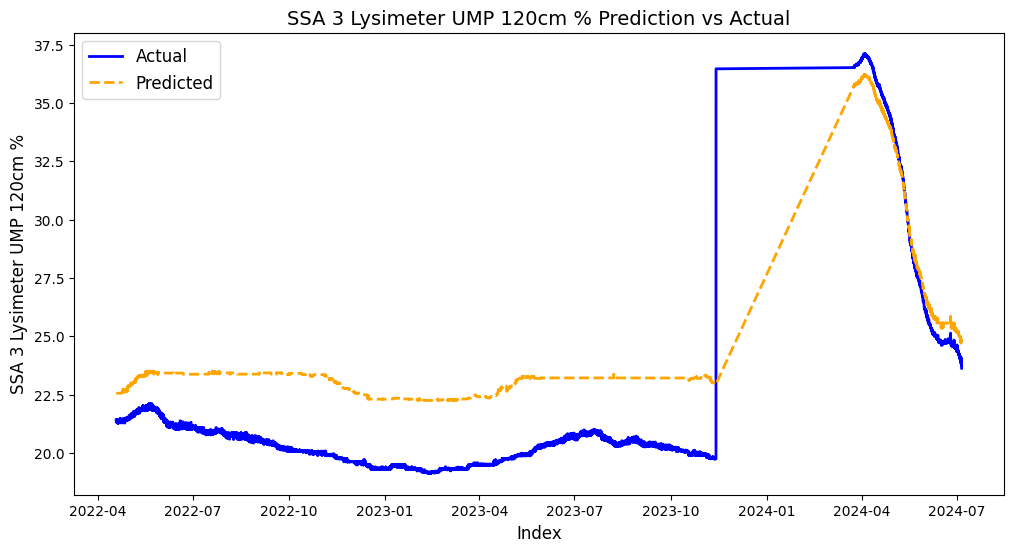

In [5]:
import matplotlib.pyplot as plt

col = 'SSA 3 Lysimeter UMP 120cm %'

plt.figure(figsize=(12, 6))

# Plot actual values as a line
plt.plot(Y_test.index, Y_test[col], color='blue', label='Actual', linewidth=2)

# Plot predicted values as a line (directly from models)
Y_pred_col = np.array([models[col].predict(X_test) for col in [col]]).flatten()
plt.plot(Y_test.index, Y_pred_col, color='orange', linestyle='--', label='Predicted', linewidth=2)

plt.xlabel('Index', fontsize=12)
plt.ylabel(col, fontsize=12)
plt.title(f'{col} Prediction vs Actual', fontsize=14)
plt.legend(fontsize=12)

plt.show()


In [6]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
import pandas as pd
import numpy as np

# Make predictions for all columns
Y_pred = np.column_stack([models[col].predict(X_test) for col in Y_train.columns])
Y_pred_df = pd.DataFrame(Y_pred, columns=Y_test.columns, index=Y_test.index)

# Compute metrics per column
metrics = {}
for col in Y_test.columns:
    rmse = root_mean_squared_error(Y_test[col], Y_pred_df[col])  # RMSE
    mae = mean_absolute_error(Y_test[col], Y_pred_df[col])       # MAE
    r2 = r2_score(Y_test[col], Y_pred_df[col])                   # R²
    metrics[col] = {"RMSE": rmse, "MAE": mae, "R2": r2}

# Display metrics
for col, m in metrics.items():
    print(f"{col}: RMSE = {m['RMSE']:.4f}, MAE = {m['MAE']:.4f}, R² = {m['R2']:.4f}")


SSA 3 Lysimeter UMP 120cm %: RMSE = 2.6093, MAE = 2.4461, R² = 0.6103
SSA 3 Lysimeter UMP 30cm %: RMSE = 1.1889, MAE = 1.1098, R² = 0.9717
SSA 3 Lysimeter UMP 75cm %: RMSE = 1.0820, MAE = 0.9532, R² = 0.9211
SSA 3 Lysimeter battery V: RMSE = 0.1402, MAE = 0.1172, R² = 0.9302
SSA 3 Lysimeter ec 120cm mS/cm: RMSE = 0.0080, MAE = 0.0066, R² = 0.7337
SSA 3 Lysimeter ec 30cm mS/cm: RMSE = 0.0048, MAE = 0.0033, R² = 0.9143
SSA 3 Lysimeter ec 75cm mS/cm: RMSE = 0.0049, MAE = 0.0033, R² = 0.8891
SSA 3 Lysimeter scale (1) kg: RMSE = 29.1933, MAE = 20.1304, R² = 0.7343
SSA 3 Lysimeter temperature 120cm degC: RMSE = 0.6863, MAE = 0.5991, R² = 0.9798
SSA 3 Lysimeter temperature 30cm degC: RMSE = 0.9198, MAE = 0.7812, R² = 0.9801
SSA 3 Lysimeter temperature 75cm degC: RMSE = 0.7741, MAE = 0.6693, R² = 0.9804
SSA 3 Lysimeter tension 120cm kPa: RMSE = 0.7384, MAE = 0.7281, R² = -0.8521
SSA 3 Lysimeter tension 30cm kPa: RMSE = 0.2809, MAE = 0.1783, R² = 0.8836
SSA 3 Lysimeter tension 75cm kPa: RMSE = 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from tqdm import tqdm

# Train one Random Forest model per target
models_random_forest = {}
for col in tqdm(Y_train.columns, desc="Training Random Forest models"):
    var = Y_train[col].var()
    if var <= 100:
        params = {'n_estimators': 100, 'max_depth': 7}
    elif var >= 100 and var < 500:
        params = {'n_estimators': 175, 'max_depth': 12}
    else:
        params = {'n_estimators': 500, 'max_depth': 25}

    model_random_forest = RandomForestRegressor(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        n_jobs=-1,
        random_state=42,
        
    )
    model_random_forest.fit(X_train, Y_train[col])
    models_random_forest[col] = model_random_forest

# Predict all targets
Y_pred = pd.DataFrame(
    {col: models_random_forest[col].predict(X_test) for col in Y_train.columns},
    index=Y_test.index
)

print("Predictions shape:", Y_pred.shape)

# Calculate RMSE for each target
rmse_scores = {col: np.sqrt(root_mean_squared_error(Y_test[col], Y_pred[col])) for col in Y_test.columns}

# Display RMSE
for col, score in rmse_scores.items():
    print(f"{col}: RMSE = {score:.4f}")


Training Random Forest models: 100%|██████████| 75/75 [42:48<00:00, 34.25s/it] 


Predictions shape: (16255, 75)
SSA 3 Lysimeter UMP 120cm %: RMSE = 1.2822
SSA 3 Lysimeter UMP 30cm %: RMSE = 0.8500
SSA 3 Lysimeter UMP 75cm %: RMSE = 0.6965
SSA 3 Lysimeter battery V: RMSE = 0.3052
SSA 3 Lysimeter ec 120cm mS/cm: RMSE = 0.0673
SSA 3 Lysimeter ec 30cm mS/cm: RMSE = 0.0696
SSA 3 Lysimeter ec 75cm mS/cm: RMSE = 0.0693
SSA 3 Lysimeter scale (1) kg: RMSE = 4.9007
SSA 3 Lysimeter temperature 120cm degC: RMSE = 0.2563
SSA 3 Lysimeter temperature 30cm degC: RMSE = 0.3346
SSA 3 Lysimeter temperature 75cm degC: RMSE = 0.3684
SSA 3 Lysimeter tension 120cm kPa: RMSE = 0.2582
SSA 3 Lysimeter tension 30cm kPa: RMSE = 0.5815
SSA 3 Lysimeter tension 75cm kPa: RMSE = 0.3731
SSA 3 Lysimeter vacuum 120cm kPa: RMSE = 0.4181
SSA 3 Lysimeter vacuum 30cm kPa: RMSE = 0.4598
SSA 3 Lysimeter vacuum 75cm kPa: RMSE = 0.8429
SSA 4 Schacht UMP (1) 120cm %: RMSE = 3.5039
SSA 4 Schacht UMP (1) 30cm %: RMSE = 0.7490
SSA 4 Schacht UMP (1) 75cm %: RMSE = 0.7596
SSA 4 Schacht UMP (2) 120cm %: RMSE = 2.5

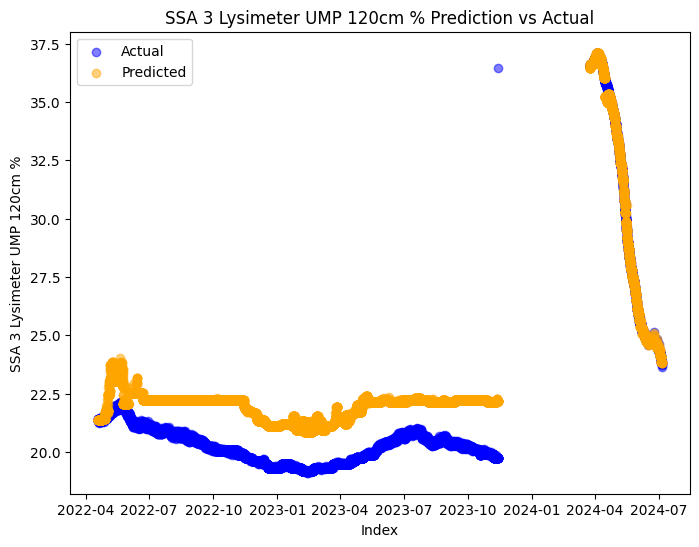

In [9]:
import matplotlib.pyplot as plt

col = 'SSA 3 Lysimeter UMP 120cm %'

plt.figure(figsize=(8,6))
plt.scatter(Y_test.index, Y_test[col], color='blue', alpha=0.5, label='Actual')
plt.scatter(Y_test.index, Y_pred[col], color='orange', alpha=0.5, label='Predicted')

plt.xlabel('Index')
plt.ylabel(col)
plt.title(f'{col} Prediction vs Actual')
plt.legend()
plt.show()


In [15]:
rmse_scores = {col: np.sqrt(root_mean_squared_error(Y_test[col], Y_pred[col])) for col in Y_test.columns}

# Sort RMSE scores descending
rmse_sorted = sorted(rmse_scores.items(), key=lambda x: x[1], reverse=True)

# Write to txt file
output_path = "../random_forest_rmse.txt"
with open(output_path, "w") as f:
    f.write("Random Forest RMSE:\n\n")
    for col, score in rmse_sorted:
        f.write(f"{col}: RMSE = {score:.4f}\n")

In [20]:
import os
import joblib

#Create folder if not exists
os.makedirs('../models/removed_outliers_traditional_ml/random_forest', exist_ok=True)
# Save each model separately
for col, model in models_random_forest.items():
    filename = f"../models/removed_outliers_traditional_ml/random_forest/{col.replace('/', '_').replace(' ', '_')}.pkl"
    joblib.dump(model, filename)

print("All models saved successfully.")

All models saved successfully.


In [21]:
# RMSE
for col, score in rmse_scores.items():
    print(f"{col}: RMSE = {score:.4f}")

xgbboost_rmse_scores = {col: np.sqrt(root_mean_squared_error(Y_test[col], Y_pred[col])) for col in Y_test.columns}
# Sort RMSE scores descending
xgbboost_rmse_sorted = sorted(xgbboost_rmse_scores.items(), key=lambda x: x[1], reverse=True)
# Write to txt file
output_path = "../lightgbm_rmse.txt"
with open(output_path, "w") as f:
    f.write("lightgbm RMSE:\n\n")
    f.write("Sensor\t\t\t\t\tRMSE\t\tMAE\t\tR2\n")
    f.write("-" * 60 + "\n")
    for sensor, vals in metrics.items():
        f.write(f"{sensor:<35} {vals['RMSE']:<10.4f} {vals['MAE']:<10.4f} {vals['R2']:<10.4f}\n")


SSA 3 Lysimeter UMP 120cm %: RMSE = 1.2822
SSA 3 Lysimeter UMP 30cm %: RMSE = 0.8500
SSA 3 Lysimeter UMP 75cm %: RMSE = 0.6965
SSA 3 Lysimeter battery V: RMSE = 0.3052
SSA 3 Lysimeter ec 120cm mS/cm: RMSE = 0.0673
SSA 3 Lysimeter ec 30cm mS/cm: RMSE = 0.0696
SSA 3 Lysimeter ec 75cm mS/cm: RMSE = 0.0693
SSA 3 Lysimeter scale (1) kg: RMSE = 4.9007
SSA 3 Lysimeter temperature 120cm degC: RMSE = 0.2563
SSA 3 Lysimeter temperature 30cm degC: RMSE = 0.3346
SSA 3 Lysimeter temperature 75cm degC: RMSE = 0.3684
SSA 3 Lysimeter tension 120cm kPa: RMSE = 0.2582
SSA 3 Lysimeter tension 30cm kPa: RMSE = 0.5815
SSA 3 Lysimeter tension 75cm kPa: RMSE = 0.3731
SSA 3 Lysimeter vacuum 120cm kPa: RMSE = 0.4181
SSA 3 Lysimeter vacuum 30cm kPa: RMSE = 0.4598
SSA 3 Lysimeter vacuum 75cm kPa: RMSE = 0.8429
SSA 4 Schacht UMP (1) 120cm %: RMSE = 3.5039
SSA 4 Schacht UMP (1) 30cm %: RMSE = 0.7490
SSA 4 Schacht UMP (1) 75cm %: RMSE = 0.7596
SSA 4 Schacht UMP (2) 120cm %: RMSE = 2.5982
SSA 4 Schacht UMP (2) 30cm 

In [23]:

os.makedirs('../models/removed_outliers_traditional_ml/lightgbm', exist_ok=True)


for col, model in models.items():
    safe_name = col.replace('/', '_').replace(' ', '_').replace('(', '').replace(')', '')
    path = f"../models/removed_outliers_traditional_ml/lightgbm/{safe_name}.pkl"
    joblib.dump(model, path)

print("All LightGBM models saved successfully.")

All LightGBM models saved successfully.
